# How Weather and Taxi Companies Affect Rides in Chicago

This project looks at taxi rides in Chicago to understand where people travel the most, which companies handle the most rides, and how weather affects trip times. The goal is to find patterns and see how different factors, like bad weather, change ride durations.

## Initialization

In [1]:
# Loading all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from IPython.display import display
from scipy import stats as st 

## Load data

In [3]:
# Load the data files into different DataFrames
try:
    rides_per_company= pd.read_csv('moved_project_sql_result_01.csv')
except:
    rides_per_company = pd.read_csv('datasets/moved_project_sql_result_01.csv')

rides_per_company.head()


,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [5]:
rides_per_company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [6]:
rides_per_company.describe()

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


In [16]:
rides_per_company.duplicated().sum()

0

In [4]:
try:
    dropoff_trips= pd.read_csv('moved_project_sql_result_04.csv')
except:
    dropoff_trips = pd.read_csv('datasets/moved_project_sql_result_04.csv')

dropoff_trips.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [5]:
dropoff_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [6]:
dropoff_trips.describe()

,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


In [7]:
dropoff_trips.duplicated().sum()

0

In [8]:
try:
    trip_weather= pd.read_csv('moved_project_sql_result_07.csv')
except:
    trip_weather = pd.read_csv('datasets/moved_project_sql_result_07.csv')

trip_weather.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [11]:
trip_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [12]:
trip_weather['start_ts']= pd.to_datetime(trip_weather['start_ts'])
trip_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


In [13]:
trip_weather.describe()

,duration_seconds
count,1068.000000
mean,2071.731273
std,769.461125
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2580.000000
max,7440.000000


In [14]:
trip_weather.duplicated().sum()

197

In [19]:
trip_weather[trip_weather.duplicated()].sort_values(by= 'start_ts')

,start_ts,weather_conditions,duration_seconds
541,2017-11-04 05:00:00,Good,1200.0
682,2017-11-04 06:00:00,Good,1267.0
833,2017-11-04 07:00:00,Good,1440.0
933,2017-11-04 07:00:00,Good,1200.0
979,2017-11-04 07:00:00,Good,1140.0
...,...,...,...
1052,2017-11-18 15:00:00,Good,3240.0
359,2017-11-18 16:00:00,Bad,2820.0
831,2017-11-25 11:00:00,Good,1680.0
255,2017-11-25 12:00:00,Good,1380.0


In [21]:

# Sort the DataFrame by all columns to group duplicates together
df_sorted = trip_weather.sort_values(by=list(trip_weather.columns))

# Check for duplicates and display them
duplicates = df_sorted[df_sorted.duplicated(keep=False)]

duplicates


,start_ts,weather_conditions,duration_seconds
462,2017-11-04 05:00:00,Good,1200.0
541,2017-11-04 05:00:00,Good,1200.0
681,2017-11-04 06:00:00,Good,1267.0
682,2017-11-04 06:00:00,Good,1267.0
332,2017-11-04 07:00:00,Good,1140.0
...,...,...,...
831,2017-11-25 11:00:00,Good,1680.0
53,2017-11-25 12:00:00,Good,1380.0
255,2017-11-25 12:00:00,Good,1380.0
929,2017-11-25 12:00:00,Good,1440.0


We can see it's just not needed duplicates so we would drop them all

In [22]:
trip_weather= trip_weather.drop_duplicates()
trip_weather.duplicated().sum()

0

##  Top 10 neighborhoods in terms of drop-offs

In [17]:
dropoff_trips.sort_values(by='average_trips', ascending= False).head(10)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


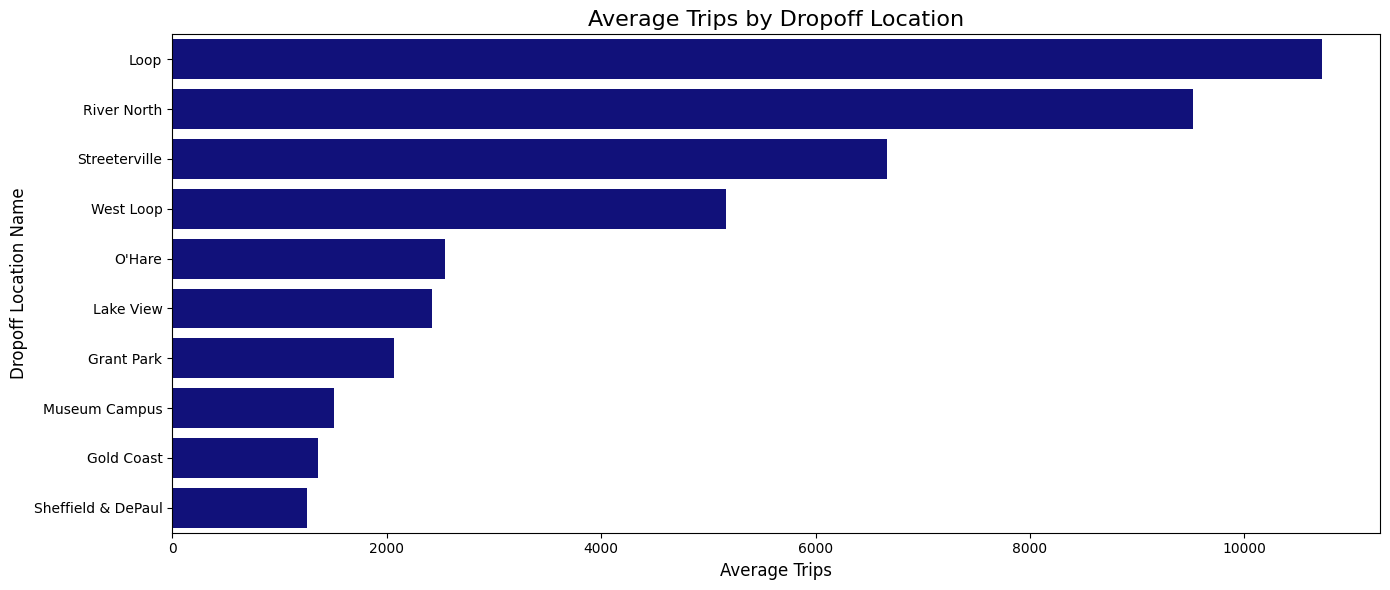

In [26]:
# Create a bar plot
plt.figure(figsize=(14, 6))
sns.barplot(x='average_trips', y='dropoff_location_name', data=dropoff_trips.sort_values(by='average_trips', ascending= False).head(10), color= '#00008B')

# Add titles and labels
plt.title('Average Trips by Dropoff Location', fontsize=16)
plt.xlabel('Average Trips', fontsize=12)
plt.ylabel('Dropoff Location Name', fontsize=12)
plt.grid(False)

# Show the plot
plt.tight_layout()
plt.show()


This graph shows the average number of trips for each dropoff location. The Loop has the highest average trips, followed by River North and Streeterville, while Sheffield & DePaul has the lowest. The Loop and nearby areas are clearly hotspots for taxis, probably because they are busy business, shopping, and tourist areas.

## Taxi companies and number of rides

In [27]:
dt= rides_per_company.sort_values(by='trips_amount', ascending= False)
dt[dt['trips_amount']> 1000]

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


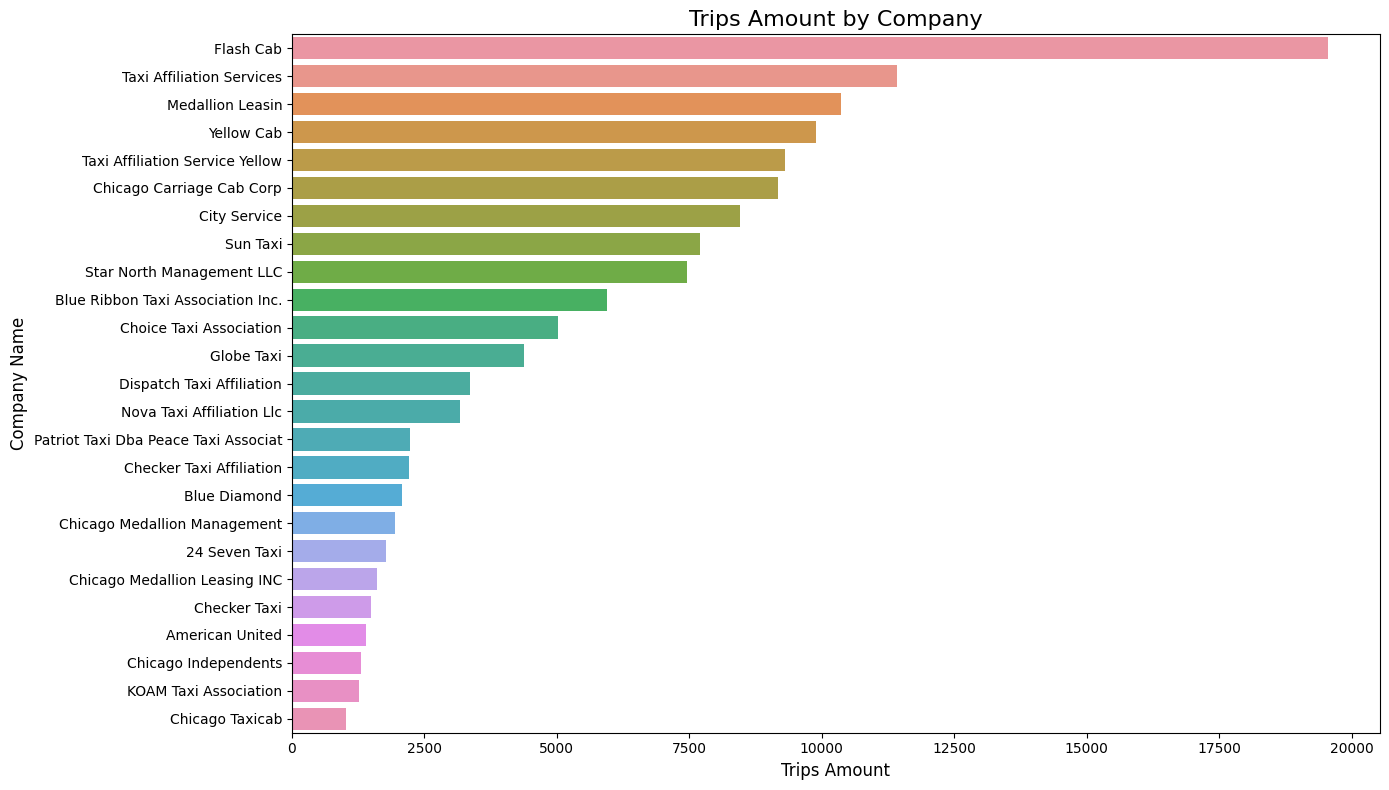

In [28]:
# Create a bar plot
plt.figure(figsize=(14, 8))
sns.barplot(x='trips_amount', y='company_name', data=dt[dt['trips_amount']> 1000])

# Add titles and labels
plt.title('Trips Amount by Company', fontsize=16)
plt.xlabel('Trips Amount', fontsize=12)
plt.ylabel('Company Name', fontsize=12)
plt.grid(False)

# Show the plot
plt.tight_layout()
plt.show()

Out of 64 taxi companies, only 25 handled more than 1,000 trips. Flash Cab had the most rides by far, with smaller companies getting far fewer trips. This shows that only a few companies get most of the business, which might make it hard for smaller companies to compete.

## Statistical study 

- Null Hypothesis: The average ride duration from the Loop to O'Hare International Airport does not change on rainy Saturdays.
- Alternative Hypothesis: The average ride duration from the Loop to O'Hare International Airport changes on rainy Saturdays.

In [29]:
# Filtered the data to include only rides on Saturdays.
saturdays_df = trip_weather[trip_weather['start_ts'].dt.dayofweek == 5]

# Spliting the data 
good= saturdays_df[saturdays_df['weather_conditions'] == 'Good']
bad= saturdays_df[saturdays_df['weather_conditions'] == 'Bad']

In [30]:
# Perform t-test
t_stat, p_value = st.ttest_ind(good['duration_seconds'], bad['duration_seconds'])
print(f"Hypothesis 1 - t-statistic: {t_stat}, p-value: {p_value}")

Hypothesis 1 - t-statistic: -5.427957689754561, p-value: 7.397770692813658e-08


The p-value is much smaller than 0.05, so we reject the null hypothesis. This means ride durations are different in bad weather, likely taking longer on rainy Saturdays.

## Conclusion

This project shows three important things:

- The Loop and nearby areas are the busiest for taxis.
- A few big companies handle most of the rides.
- Bad weather, like rain, makes trips longer, especially on Saturdays.

These findings can help improve taxi services and predict delays during bad weather. More research could look at how other factors, like time of day or seasons, affect rides.